In [1]:
# Clear all existing variables
%reset -f

In [2]:
#packages
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Widening the screen
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# Widening the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
FS=25
rcParams['figure.dpi'] = 1800
rcParams['savefig.dpi'] = 800
rcParams['font.size'] = FS
rcParams['font.family'] = 'StixGeneral'
rcParams["mathtext.fontset"] = 'stix'
# rcParams["mathtext.default"] = "rm" 
# rcParams['xtick.direction'] = 'in'
plt.rc('font', size=FS)          # controls default text sizes
plt.rc('axes', titlesize=FS)     # fontsize of the axes title
plt.rc('axes', labelsize=FS)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=FS)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FS)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=FS)   # fontsize of the figure title

In [4]:
#grid
LX =435
LT =200
dx =1.0
dt =0.001

In [5]:
#parameter
#Ph: N1
D1  =162.0
A11 =1.0
A21 =0.917
A31 =0.962

#Su: N2
D2  =10.0
A12 =1.0
A22 =1.0
A32 =1.0

#Sp: N3
D3  =78.5
A13 =1.0
A23 =0.984
A33 =1.0

R1  =np.zeros(LX)+1.0
R2  =np.zeros(LX)+1.0
R3  =np.zeros(LX)+1.0
R1[30:180] =R1[30:180]-np.linspace(1,0,150)
R2[30:180] =R2[30:180]-np.linspace(1,0,150)
R3[30:60]  =R3[30:60] -np.linspace(1,0,30)
R1[0:30] =0.0
R2[0:30] =0.0
R3[0:30] =0.0

In [6]:
#import data
import pandas
# area
df       = pandas.read_csv('./Data S1 Percent cover.csv',header=0)
df1990   = df[df.Year == 1990]
df1990ph = df1990[df1990.Vegetation == 'ph']#
df1990su = df1990[df1990.Vegetation == 'su']
df1990sp = df1990[df1990.Vegetation == 'sp']

In [7]:
# salinity
dfe = pandas.read_csv('./Data S2 Salinity.csv',header=0)

In [8]:
# Salinity Before 1990
from numpy import polyfit, poly1d
dfe1990   = dfe[dfe['Year']<1990]
x1990     = dfe1990.Distance 
y1990     = dfe1990.Salinity
# polyfit
coeff1990 = polyfit(x1990, y1990, 1)
print(coeff1990)
# predict
f1990     = poly1d(coeff1990)
xnew1990  = np.linspace(0.0, (435.0-1.0)*30.0/1000.0,LX)
ynew1990  = f1990(xnew1990)

[0.02630668 0.62144737]


In [9]:
#initial value
N0 = 1.0
N1 = np.flipud( df1990ph.Percent_cover ) #Phragmites australis
N2 = np.flipud( df1990su.Percent_cover ) #Suaeda salsa
N3 = np.flipud( df1990sp.Percent_cover ) #Spartina alterniflora 

# Ma = np.zeros((LT,LX))
# Mb = np.zeros((LT,LX))
# Mc = np.zeros((LT,LX))
# Me = np.zeros((LT,LX))

In [10]:
#diffuse
def d2_dx2(Z): 
    Zleft = np.roll(Z, 1, axis=0)
    Zright = np.roll(Z, -1, axis=0)
    return (Zleft + Zright - 2.0 * Z) / dx**2

In [11]:
def d_dx(Z): # First order derivative that assumes periodic boundary conditions
    Zleft = np.roll(Z, 1, axis=0)
    Zcenter = Z[:]
    return (Zcenter - Zleft) / dx

# simulation

In [12]:
npoint = 2
# npointE = 1
AA = np.linspace(0.2,0.2,1)
BB = np.linspace(1.0, 1.0,1)
c  = np.flipud(ynew1990)
FF = np.linspace(0.02, 0.02,1)
DD = np.linspace(0.1, 0.1,1)
EE = np.linspace(0.0,0.18,npoint)#e=0.15 0.01,0.25

PhMean = np.zeros((npoint,LT))
SuMean = np.zeros((npoint,LT))
SpMean = np.zeros((npoint,LT))

Ma     =np.zeros((npoint,LT,LX))
Mb     =np.zeros((npoint,LT,LX))
Mc     =np.zeros((npoint,LT,LX))
Me     =np.zeros((npoint,LT,LX))

In [13]:
Sui = 0
# SuiE = 0
for a in AA:
    for b in BB:
        for f in FF:
            for d in DD:
                for e in EE:
                    if e == 0.0:
                        d = 0.0
                    else:
                        d = 0.1
                #main simulation
                    N1     = np.flipud( df1990ph.Percent_cover )
                    N2     = np.flipud( df1990su.Percent_cover )
                    N3     = np.flipud( df1990sp.Percent_cover )
                    
                    E      = np.flipud(ynew1990)
#                     Ma     =np.zeros((npoint,LT,LX))
#                     Mb     =np.zeros((npoint,LT,LX))
#                     Mc     =np.zeros((npoint,LT,LX))
#                     Me     =np.zeros((npoint,LT,LX))
                    for j in range(int(LT)):
                        Ma[Sui,j,:] = N1
                        Mb[Sui,j,:] = N2
                        Mc[Sui,j,:] = N3
                        Me[Sui,j,:] = E
                        Nall = np.mean(N1+N2+N3)
                        PhMean[Sui,j] = np.mean(N1)/Nall
                        SuMean[Sui,j] = np.mean(N2)/Nall
                        SpMean[Sui,j] = np.mean(N3)/Nall
#                         EMean[SuiE,SuiB]  = np.mean(E)
                        for i in range(int(1/dt)):
                            a12 = (A12/(E+a))
                            N1, N2, N3,E = \
                            N1 + dt*( D1*d2_dx2(N1) + N1*(R1-A11*N1-A21*N2-A31*N3) ),\
                            N2 + dt*( D2*d2_dx2(N2) + N2*(R2-a12*N1-A22*N2-A32*N3) ),\
                            N3 + dt*( D3*d2_dx2(N3) + N3*(R3-A13*N1-A23*N2-A33*N3) + 6.2*d_dx(N3) ),\
                            E  + dt*( f*(c - E) + d*N3/(b+N3)*E - e*np.sum(N3)/LX*E )
                                
                            #boundary conditions
                            N1[0]=N1[1]
                            N1[LX-1]=N1[LX-2]
                            N2[0]=N2[1]
                            N2[LX-1]=N2[LX-2]
                            N3[0]=N3[1]
                            N3[LX-1]=N3[LX-2]
                            E[0]=E[1]
                            E[LX-1]=E[LX-2]
                    Sui = Sui+1
#         print(Sui,SuMean)

# save to csv

In [14]:
# import pandas as pd
# np.save('ParsAnalysis_E_EE.npy',EE)
# np.save('ParsAnalysis_E_PhMean.npy',PhMean)
# np.save('ParsAnalysis_E_SuMean.npy',SuMean)
# np.save('ParsAnalysis_E_SpMean.npy',SpMean)

In [15]:
# EE=np.load('ParsAnalysis_E_EE.npy')
# PhMean=np.load('ParsAnalysis_E_PhMean.npy')
# SuMean=np.load('ParsAnalysis_E_SuMean.npy')
# SpMean=np.load('ParsAnalysis_E_SpMean.npy')

# Plot

In [16]:
# nticker = 6
# from matplotlib import ticker
# fig1, ax = plt.subplots(1, 1, figsize=(6, 6))
# # line10, = ax.plot(EE , PhMean[0,:]*100, lw=2, color='b', label='P. australis'); 
# # line11, = ax.plot(EE , SuMean[0,:]*100, lw=2, color='r', label='S. salsa'); 
# # line12, = ax.plot(EE , SpMean[0,:]*100, lw=2, color='g', label='S. alterniflora'); 
# line10, = ax.plot(EE , PhMean[0,:]*100, lw=3, color='#00CCFF', label='$Phragmites$ $australis$'); 
# line11, = ax.plot(EE , SuMean[0,:]*100, lw=3, color='r', label='$Suaeda$ $salsa$'); 
# line12, = ax.plot(EE , SpMean[0,:]*100, lw=3, color='#009966', label='$Spartina$ $alterniflora$'); 

# ax.set_xlim(0.0, 0.25)
# ax.set_xticks(np.linspace(0.0,0.25,nticker))

# ax.set_ylim(-0.7, 70)
# # Ylabels = np.linspace(0.0, 0.7,nticker).round(1)
# ax.set_yticks(np.linspace(0.0, 70,nticker))

# ax.set_xlabel('Strength of long-distance interaction, $e$');
# ax.set_ylabel('Percent coverage (%)');

# ax.spines['bottom'].set_linewidth(1.5);
# ax.spines['left'].set_linewidth(1.5);
# ax.spines['right'].set_linewidth(1.5);
# ax.spines['top'].set_linewidth(1.5);

# ax.legend(fontsize=FS,frameon=False,loc=(0.03,0.42))
# ax.grid()
# fig1.savefig('Figure 4d Trajectories & Equilibrium.pdf',bbox_inches='tight')

In [17]:
# npoint = 35
# import matplotlib as mpl
# import ternary
# ## Sample trajectory plot
# figure, tax = ternary.figure(scale=1.0)
# figure.set_size_inches(4, 4)

# # Draw Boundary and Gridlines
# tax.boundary(linewidth=1.0)
# tax.gridlines(color="black", multiple=0.2)

# # Set Axis labels and Title
# fontsize = 12
# offset = 0.14
# tax.set_title("e = 0.0\n", fontsize=fontsize)
# # tax.right_corner_label("X", fontsize=fontsize)
# # tax.top_corner_label("Y", fontsize=fontsize)
# # tax.left_corner_label("Z", fontsize=fontsize)

# tax.left_axis_label("$\it{S. alterniflora}$", fontsize=fontsize, offset=offset)
# tax.right_axis_label("$\it{S. salsa}$", fontsize=fontsize, offset=offset)
# tax.bottom_axis_label("$\it{P. australis}$", fontsize=fontsize, offset=0.1)

# cmlog = plt.cm.get_cmap('viridis')
# # viridis, hsv, YlGn, BrGG, bwr,
# # cmlog = plt.cm.gist_rainbow

# for par in (0,0):#(0,6, 7,13, 14,20, 21,27, 28,34, 35,41, 42,47):#(0,3, 20,23, 25,28, 30,33):#(0,3, 5,8, 10,13, 15,18, 20,23, 25,28, 30,33):#range(npoint):
#     points = []
#     test = np.array([PhMean[par,:], SuMean[par,:], SpMean[par,:] ]).T
#     np.savetxt('test.txt', test, delimiter=' ')
#     Time=[]
#     Time=np.linspace(0.0,np.size(test,0)*0.0108,np.size(test,0))
    
#     # Load some data, tuples (x,y,z)
#     with open("test.txt") as handle:
#         for line in handle:
#             points.append(list(map(float, line.split(' '))))
#     # Plot the data
# #     tax.plot_colored_trajectory(points, cmap=cmlog, linewidth=1.0)
#     tax.scatter(points, c=Time, cmap=cmlog, marker='o', s=5, label = par ) 
 
# # Set ticks
# tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02)

# # Remove default Matplotlib Axes
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')
# # tax.legend(loc="upper right", fontsize=10)

# tax.show()    
# figure.savefig('Figure S9c Trajectories & Equilibrium.pdf',bbox_inches='tight')


In [18]:
# npoint = 35
# import matplotlib as mpl
# import ternary
# ## Sample trajectory plot
# figure, tax = ternary.figure(scale=1.0)
# figure.set_size_inches(4, 4)

# # Draw Boundary and Gridlines
# tax.boundary(linewidth=1.0)
# tax.gridlines(color="black", multiple=0.2)

# # Set Axis labels and Title
# fontsize = 12
# offset = 0.14
# tax.set_title("e = 0.18\n", fontsize=fontsize)
# # tax.right_corner_label("X", fontsize=fontsize)
# # tax.top_corner_label("Y", fontsize=fontsize)
# # tax.left_corner_label("Z", fontsize=fontsize)

# tax.left_axis_label("$\it{S. alterniflora}$", fontsize=fontsize, offset=offset)
# tax.right_axis_label("$\it{S. salsa}$", fontsize=fontsize, offset=offset)
# tax.bottom_axis_label("$\it{P. australis}$", fontsize=fontsize, offset=0.1)

# cmlog = plt.cm.get_cmap('viridis')
# # viridis, hsv, YlGn, BrGG, bwr,
# # cmlog = plt.cm.gist_rainbow

# for par in (1,1):#(0,6, 7,13, 14,20, 21,27, 28,34, 35,41, 42,47):#(0,3, 20,23, 25,28, 30,33):#(0,3, 5,8, 10,13, 15,18, 20,23, 25,28, 30,33):#range(npoint):
#     points = []
#     test = np.array([PhMean[par,:], SuMean[par,:], SpMean[par,:] ]).T
#     np.savetxt('test.txt', test, delimiter=' ')
#     Time=[]
#     Time=np.linspace(0.0,np.size(test,0)*0.0108,np.size(test,0))
    
#     # Load some data, tuples (x,y,z)
#     with open("test.txt") as handle:
#         for line in handle:
#             points.append(list(map(float, line.split(' '))))
#     # Plot the data
# #     tax.plot_colored_trajectory(points, cmap=cmlog, linewidth=1.0)
#     tax.scatter(points, c=Time, cmap=cmlog, marker='o', s=5, label = par ) 
 
# # Set ticks
# tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02)

# # Remove default Matplotlib Axes
# tax.clear_matplotlib_ticks()
# tax.get_axes().axis('off')
# # tax.legend(loc="upper right", fontsize=10)

# tax.show()    
# figure.savefig('Figure S9d Trajectories & Equilibrium.pdf',bbox_inches='tight')


In [19]:
np.save('FS9bModelDataPh.npy',Ma[:,:,:])
np.save('FS9bModelDataSu.npy',Mb[:,:,:])
np.save('FS9bModelDataSp.npy',Mc[:,:,:])
np.save('FS9bModelDataSa.npy',Me[:,:,:])

In [20]:
# Ma = np.load('FS9bModelDataPh.npy')
# Mb = np.load('FS9bModelDataSu.npy')
# Mc = np.load('FS9bModelDataSp.npy')
# Me = np.load('FS9bModelDataSa.npy')

In [21]:
# Widening the screen
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# Widening the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
FS=20
rcParams['figure.dpi'] = 600
rcParams['savefig.dpi'] = 600
rcParams['font.size'] = FS
rcParams['font.family'] = 'StixGeneral'
rcParams["mathtext.fontset"] = 'stix'
# rcParams["mathtext.default"] = "rm" 
# rcParams['xtick.direction'] = 'out'
plt.rc('font', size=FS)          # controls default text sizes
plt.rc('axes', titlesize=FS)     # fontsize of the axes title
plt.rc('axes', labelsize=FS)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=FS)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FS)    # fontsize of the tick labels
plt.rc('legend', fontsize=FS)    # legend fontsize
plt.rc('figure', titlesize=FS)   # fontsize of the figure title

13.02
(2, 200, 435)


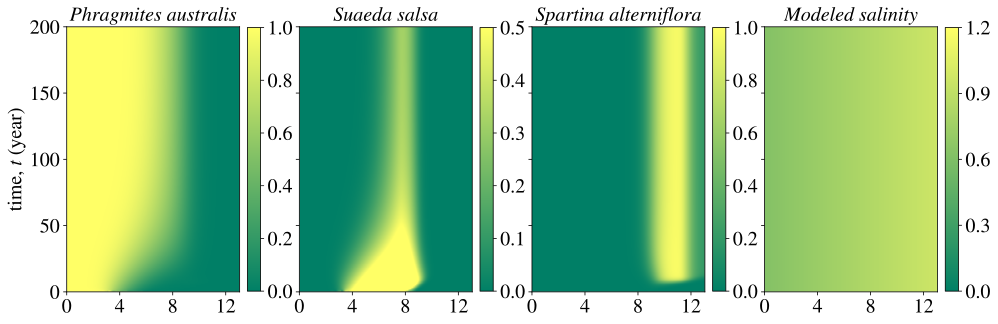

In [22]:
# dim(Ma[0+7*0,LT-1,:])
Ma.shape
lengthX=(LX-1)*0.03
print(lengthX)

from scipy import io
import os
if not os.path.exists("Data"):
    os.makedirs("Data")
io.savemat('Data/Fig5C_data.mat', {'Ma': np.flipud(Ma[0+7*0,:,::-1]), "Mb": np.flipud(Ma[0+7*0,:,::-1]), 
                                    "Mc": np.flipud(Mc[0+7*0,:,::-1]),"Me": np.flipud(Me[0+7*0,:,::-1])})
io.savemat('Data/Fig5D_data.mat', {'Ma': np.flipud(Ma[1+7*0,:,::-1]), "Mb": np.flipud(Ma[1+7*0,:,::-1]), 
                                    "Mc": np.flipud(Mc[1+7*0,:,::-1]),"Me": np.flipud(Me[1+7*0,:,::-1])})
# plot_color_gradients('Sequential',
#                      ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])
# plot_color_gradients('Sequential (2)',
#                      ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
#                       'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
#                       'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])

orig_map=plt.cm.get_cmap('copper') # viridis  YlGn, summer
reversed_map = orig_map.reversed()

nticker = 4
from matplotlib import ticker
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt
#simulation result
fig, ax = plt.subplots(1, 4, figsize=(16, 5),sharey=True)
# fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9, hspace=0.0, wspace=0.0)
im0 = ax[0].imshow(np.flipud(Ma[0+7*0,:,::-1]),cmap='summer',extent=[0,(LX)*30.0/1000.0,0,200],aspect=20/200,clim=(0,1));#, clim=(0,0.1));
cbar=plt.colorbar(im0, ax=ax[0],fraction=0.068,pad=0.04);
ax[0].set_title('$Phragmites$ $australis$'); ax[0].set_ylabel('time, $t$ (year)');
tick_locator = ticker.MaxNLocator(nbins=5); cbar.locator = tick_locator; cbar.update_ticks()
ax[0].set_xticks((0,4,8,12))
# ax[0].set_xticklabels()

im1 = ax[1].imshow(np.flipud(Mb[0+7*0,:,::-1]),cmap='summer',extent=[0,(LX-.0)*30.0/1000.0,0,200],aspect=20/200,clim=(0,0.5));#, clim=(0,0.1));
ax[1].set_title('$Suaeda$ $salsa$'); #ax[1].set_yticklabels([]);
cbar=plt.colorbar(im1, ax=ax[1],fraction=0.068,pad=0.04); 
ax[1].set_xticks((0,4,8,12))

im2 = ax[2].imshow(np.flipud(Mc[0+7*0,:,::-1]),cmap='summer',extent=[0,(LX-.0)*30.0/1000.0,0,200],aspect=20/200,clim=(0,1));#, clim=(0,0.1));
ax[2].set_title('$Spartina$ $alterniflora$'); #ax[2].set_yticklabels([]);
cbar=plt.colorbar(im2, ax=ax[2],fraction=0.068,pad=0.04);
ax[2].set_xticks((0,4,8,12))

im3 = ax[3].imshow(np.flipud(Me[0+7*0,:,::-1]),cmap='summer',extent=[0,(LX-.0)*30.0/1000.0,0,200],aspect=20/200,clim=(0.0,1.2));#, clim=(0,0.1));
ax[3].set_title('$Modeled$ $salinity$'); #ax[3].set_yticklabels([]);
cbar=plt.colorbar(im3, ax=ax[3],fraction=0.068,pad=0.04);
tick_locator = ticker.MaxNLocator(nbins=4)
cbar.locator = tick_locator
cbar.update_ticks()
ax[3].set_xticks((0,4,8,12))

# fig.savefig('Fig5C'+'.pdf',bbox_inches='tight')

print(Ma.shape)

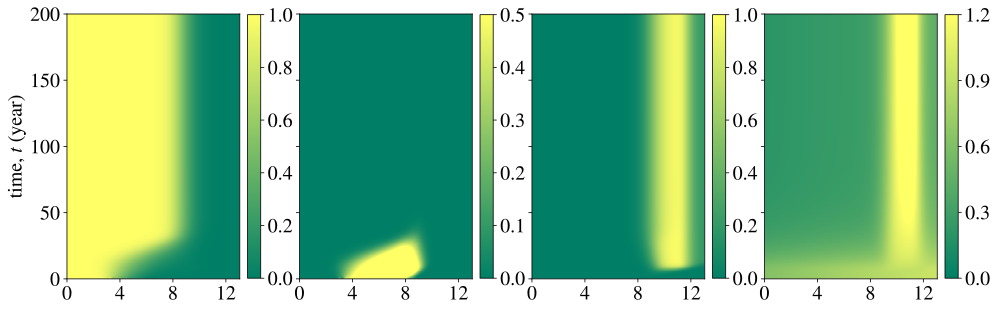

In [23]:
#simulation result
fig, ax = plt.subplots(1, 4, figsize=(16, 5),sharey=True)
# fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9, hspace=0.0, wspace=0.0)
im0 = ax[0].imshow(np.flipud(Ma[1+7*0,:,::-1]),cmap='summer',extent=[0,(LX)*30.0/1000.0,0,200],aspect=20/200,clim=(0,1));#, clim=(0,0.1));
cbar=plt.colorbar(im0, ax=ax[0],fraction=0.068,pad=0.04);
# ax[0].set_title('$Phragmites$ $australis$'); 
ax[0].set_ylabel('time, $t$ (year)');
tick_locator = ticker.MaxNLocator(nbins=5); cbar.locator = tick_locator; cbar.update_ticks()
ax[0].set_xticks((0,4,8,12))
# ax[0].set_xticklabels()

im1 = ax[1].imshow(np.flipud(Mb[1+7*0,:,::-1]),cmap='summer',extent=[0,(LX-.0)*30.0/1000.0,0,200],aspect=20/200,clim=(0,0.5));#, clim=(0,0.1));
# ax[1].set_title('$Suaeda$ $salsa$'); #ax[1].set_yticklabels([]);
cbar=plt.colorbar(im1, ax=ax[1],fraction=0.068,pad=0.04); 
ax[1].set_xticks((0,4,8,12))

im2 = ax[2].imshow(np.flipud(Mc[1+7*0,:,::-1]),cmap='summer',extent=[0,(LX-.0)*30.0/1000.0,0,200],aspect=20/200,clim=(0,1));#, clim=(0,0.1));
# ax[2].set_title('$Spartina$ $alterniflora$'); #ax[2].set_yticklabels([]);
cbar=plt.colorbar(im2, ax=ax[2],fraction=0.068,pad=0.04);
ax[2].set_xticks((0,4,8,12))

im3 = ax[3].imshow(np.flipud(Me[1+7*0,:,::-1]),cmap='summer',extent=[0,(LX-.0)*30.0/1000.0,0,200],aspect=20/200,clim=(0.0,1.2));#, clim=(0,0.1));
# ax[3].set_title('$Modeled$ $salinity$'); #ax[3].set_yticklabels([]);
cbar=plt.colorbar(im3, ax=ax[3],fraction=0.068,pad=0.04);
tick_locator = ticker.MaxNLocator(nbins=4)
cbar.locator = tick_locator
cbar.update_ticks()
ax[3].set_xticks((0,4,8,12))

# fig.savefig('Fig5D'+'.pdf',bbox_inches='tight')

In [24]:
nticker = 3
from matplotlib import ticker
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]


COLOR = (0, 0, 0.1)
def color_conv(color_range):
    return (COLOR[0] + color_range, COLOR[1], COLOR[2])
from matplotlib import cm
viridis = cm.get_cmap('viridis', 50)
# print(viridis(0.56))

#simulation result
fig = plt.figure(figsize=(16,6))
# up 上图
host = host_subplot(241)

for color_ite in range(199):   
    im0,=host.plot(np.linspace(0.0, (LX-1.0)*30.0/1000.0,LX), np.flipud(Ma[0+7*0,color_ite,:]), label='$Phragmites$ $australis$',
              linewidth=1, linestyle='-',alpha=0.6, color=viridis(color_ite/200.0))#color=color_conv(color_ite/200.0))
host.set_title('$Phragmites$ $australis$');
host.set_xlim(0.0, (LX-1.0)*30.0/1000.0);
host.set_xticks((0,4,8,12)); host.set_ylabel('Percent cover');
host.text(10, 0.8, "$t=0$", fontsize=18, va='bottom',color=viridis(1/200.0),rotation=0);
host.text(10, 0.6, "$t=\infty$", fontsize=18, va='bottom',color=viridis(200/200.0),rotation=0);

host = host_subplot(242)
for color_ite in range(199):   
    im1,=host.plot(np.linspace(0.0, (LX-1.0)*30.0/1000.0,LX), np.flipud(Mb[0+7*0,color_ite,:]), label='$Suaeda$ $salsa$',
              linewidth=1, linestyle='-',alpha=0.6, color=viridis(color_ite/200.0))#color=color_conv(color_ite/200.0))
# par.set_ylabel('$Suaeda$ $salsa$', color='c');
host.set_title('$Suaeda$ $salsa$'); host.set_xlim(0.0, (LX-1.0)*30.0/1000.0);
host.set_xticks((0,4,8,12)); host.set_yticklabels([]);


host = host_subplot(243)
for color_ite in range(199):   
    im2,=host.plot(np.linspace(0.0, (LX-1.0)*30.0/1000.0,LX), np.flipud(Mc[0+7*0,color_ite,:]), label='$Phragmites$ $australis$',
              linewidth=1, linestyle='-',alpha=0.6, color=viridis(color_ite/200.0))#color=color_conv(color_ite/200.0))
    
host.set_yticks(np.linspace(0.0, 1.0,nticker));
host.set_title('$Spartina$ $alterniflora$');host.set_xlim(0.0, (LX-1.0)*30.0/1000.0);
host.set_xticks((0,4,8,12)); host.set_yticklabels([]);

host = host_subplot(244)
# im3,= par.plot(np.linspace(0.0, (LX-1.0)*30.0/1000.0,LX), np.flipud(Me[0+7*0,LT-1,:]), 
#               color='c', label='$Modeled$ $salinity$',linewidth=3,linestyle='-.')
for color_ite in range(199):   
    im3,=host.plot(np.linspace(0.0, (LX-1.0)*30.0/1000.0,LX), np.flipud(Me[0+7*0,color_ite,:]), label='$Salinity$',
              linewidth=1, linestyle='-',alpha=0.6, color=viridis(color_ite/200.0))#color=color_conv(color_ite/200.0))
host.set_xticks((0,4,8,12));host.set_xlim(0.0, (LX-1.0)*30.0/1000.0);
host.set_yticks(np.linspace(0.0, 1.6,5)); host.yaxis.tick_right();
host.yaxis.set_major_formatter(PercentFormatter(decimals=1));
host.set_title('$Modeled$ $salinity$');
# title
# host.set_title("$e = 0.0$")
# ax.set_title('Invasion of three competitors')
# host.spines['bottom'].set_linewidth(1.5);
# host.spines['left'].set_linewidth(1.5);
# par.spines['right'].set_linewidth(1.5);
# host.spines['top'].set_linewidth(1.5);

# host.legend(fontsize=FS,ncol=2,loc=4,bbox_to_anchor=(1.05, 1), borderaxespad=1.0)#,frameon=False
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# ================ down 下图 =====================
# y left label
host = host_subplot(245)
# y right label
# par  = host.twinx()
for color_ite in range(199):   
    im4,=host.plot(np.linspace(0.0, (LX-1.0)*30.0/1000.0,LX), np.flipud(Ma[1+7*0,color_ite,:]), label='$Phragmites$ $australis$',
              linewidth=1, linestyle='-',alpha=0.6, color=viridis(color_ite/100.0))#color=color_conv(color_ite/200.0))
# host.set_ylabel('$Phragmites$ $australis$');
host.set_xlim(0.0, (LX-1.0)*30.0/1000.0); host.set_xticks((0,4,8,12))
host.set_ylabel('Percent cover');
host.text(10, 0.8, "$t=0$", fontsize=18, va='bottom',color=viridis(1/200.0),rotation=0);
host.text(10, 0.6, "$t=\infty$", fontsize=18, va='bottom',color=viridis(200/200.0),rotation=0);


host = host_subplot(246)
for color_ite in range(199):   
    im5,=host.plot(np.linspace(0.0, (LX-1.0)*30.0/1000.0,LX), np.flipud(Mb[1+7*0,color_ite,:]), label='$Suaeda$ $salsa$',
              linewidth=1, linestyle='-',alpha=0.6, color=viridis(color_ite/100.0))#color=color_conv(color_ite/200.0))
# host.set_ylabel('$Suaeda$ $salsa$');
host.set_xlim(0.0, (LX-1.0)*30.0/1000.0); host.set_xticks((0,4,8,12));host.set_yticklabels([]);

host = host_subplot(247)
for color_ite in range(199):   
    im6,=host.plot(np.linspace(0.0, (LX-1.0)*30.0/1000.0,LX), np.flipud(Mc[1+7*0,color_ite,:]), label='$Spartina$ $alterniflora$',
              linewidth=1, linestyle='-',alpha=0.6, color=viridis(color_ite/100.0))#color=color_conv(color_ite/200.0))
# host.set_ylabel('$Spartina$ $alterniflora$');
host.set_xlim(0.0, (LX-1.0)*30.0/1000.0);host.set_xticks((0,4,8,12));host.set_yticklabels([]);
host.set_xlabel('Distance from land to sea (km)');

host = host_subplot(248)
for color_ite in range(199):   
    im7,=host.plot(np.linspace(0.0, (LX-1.0)*30.0/1000.0,LX), np.flipud(Me[1+7*0,color_ite,:]), label='$Modeled$ $salinity$',
              linewidth=1, linestyle='-',alpha=0.6, color=viridis(color_ite/100.0))#color=color_conv(color_ite/200.0))
# host.set_ylabel('$Modeled$ $salinity$');
host.set_yticks(np.linspace(0.0, 1.6, 5)); host.yaxis.tick_right();
host.yaxis.set_major_formatter(PercentFormatter(decimals=1));
# host.set_xticks(np.linspace(0.0,(LX-1.0)*30.0/1000.0,nticker))
host.set_xlim(0.0, (LX-1.0)*30.0/1000.0)
host.set_xticks((0,4,8,12))
plt.tight_layout()

# title
# host.set_title("$e = 0.18$")

# ax.set_title('Invasion of three competitors')
# host.spines['bottom'].set_linewidth(1.5);
# host.spines['left'].set_linewidth(1.5);
# host.spines['right'].set_linewidth(1.5);
# host.spines['top'].set_linewidth(1.5);
# host.legend(fontsize=FS,ncol=1,loc=0)#,frameon=False

# ax.grid()
plt.savefig('Figure5CD.pdf', bbox_inches='tight')


In [25]:
# from matplotlib import animation, rc

# def updatefig(i): # To update the image at each iteration
#     global Ma, Mb, Mc
#     im0.set_ydata(np.flipud(Ma[0+7*0,i,:]))
#     im1.set_ydata(np.flipud(Mb[0+7*0,i,:]))
#     im2.set_ydata(np.flipud(Mc[0+7*0,i,:]))
#     im3.set_ydata(np.flipud(Me[0+7*0,i,:]))
#     im4.set_ydata(np.flipud(Ma[1+7*0,i,:]))
#     im5.set_ydata(np.flipud(Mb[1+7*0,i,:]))
#     im6.set_ydata(np.flipud(Mc[1+7*0,i,:]))
#     im7.set_ydata(np.flipud(Me[1+7*0,i,:]))
#     text=fig.suptitle("Time: %1.0f" % (i+1990),x=0.1,y=0.05,fontsize=16);
#     return im0,im1,im2,im3,im4,im5,im6,im7
# ani = animation.FuncAnimation(fig, updatefig, interval=10, frames = LT, repeat=False, blit=True)

# from IPython.display import HTML
# HTML(ani.to_html5_video()) 
# # write to an mp4 movie
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=3, bitrate=1800)
# ani.save('Movies S5-Simulation_Ph_Su_Sp_e=0.0_0.18_Real.mp4', writer=writer)
# print("Save movies finshes!")

© 2021, Kang Zhang, ECNU. Follow Johan van de Koppel & Quan-Xing Liu.